In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
!pip install plotly.express
!pip install
import pandas as pd
!pip install kmodes==0.12.2
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
# Sample data points
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# 1) Euclidean distance measure
kmeans_euclidean = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,
                         tol=0.0001, random_state=111, algorithm='elkan')
kmeans_euclidean.fit(X)
labels_euclidean = kmeans_euclidean.labels_
centroids_euclidean = kmeans_euclidean.cluster_centers_

# 2) Manhattan distance measure
kmeans_manhattan = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,
                          tol=0.0001, random_state=111, algorithm='elkan')
kmeans_manhattan.fit(X)
labels_manhattan = kmeans_manhattan.labels_
centroids_manhattan = kmeans_manhattan.cluster_centers_

# 3) Squared Euclidean distance measure
kmeans_sqeuclidean = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300,
                            tol=0.0001, random_state=111, algorithm='elkan')
kmeans_sqeuclidean.fit(X)
labels_sqeuclidean = kmeans_sqeuclidean.labels_
centroids_sqeuclidean = kmeans_sqeuclidean.cluster_centers_

# 4) Cosine distance measure
# Since KMeans doesn't directly support cosine distance, we can use a custom distance function
def cosine_distance_kmeans(X):
  # Calculate pairwise cosine distances
  distances = cosine_distances(X)
  return distances

# Example usage of the custom function:
cosine_distances_matrix = cosine_distance_kmeans(X)
# Further processing to apply KMeans with cosine distances
# ...

print("Euclidean distance labels:", labels_euclidean)
print("Manhattan distance labels:", labels_manhattan)
print("Squared Euclidean distance labels:", labels_sqeuclidean)
#print("Cosine distance labels:", labels_cosine)  # Requires further implementation


ERROR: You must give at least one requirement to install (see "pip help install")
Euclidean distance labels: [1 1 0 0 1 2]
Manhattan distance labels: [1 1 0 0 1 0]
Squared Euclidean distance labels: [1 1 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


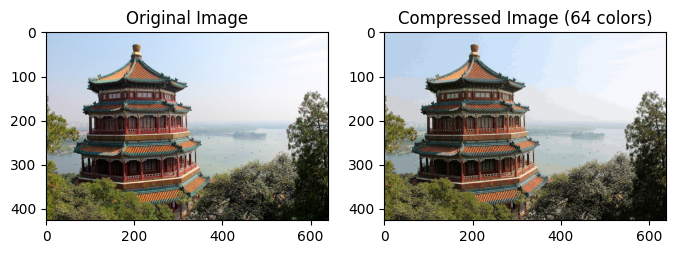

In [ ]:
#  b) Apply k-means for any of the following applications
#     1) Image Compression

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

# Load a sample image
china = load_sample_image("china.jpg")
# Convert the image to a 2D array of pixels
pixels = china.reshape((-1, 3))

# Apply k-means clustering to reduce the number of colors
n_colors = 64  # Number of colors to reduce to
kmeans = KMeans(n_clusters=n_colors)
kmeans.fit(pixels)
new_colors = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the new colors to the original image shape
new_image = new_colors.reshape(china.shape)

# Display the original and compressed images
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(china)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(new_image.astype(np.uint8))
plt.title(f"Compressed Image ({n_colors} colors)")
plt.show()


In [ ]:
# c) Evaluate the method using
#      1) Silhouette Coefficient
#      2) Sum of Squared Errors

from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient for Euclidean distance
silhouette_avg_euclidean = silhouette_score(X, labels_euclidean)
print("Silhouette Coefficient (Euclidean):", silhouette_avg_euclidean)

# Calculate Silhouette Coefficient for Manhattan distance
silhouette_avg_manhattan = silhouette_score(X, labels_manhattan)
print("Silhouette Coefficient (Manhattan):", silhouette_avg_manhattan)

# Calculate Silhouette Coefficient for Squared Euclidean distance
silhouette_avg_sqeuclidean = silhouette_score(X, labels_sqeuclidean)
print("Silhouette Coefficient (Squared Euclidean):", silhouette_avg_sqeuclidean)


# Calculate Sum of Squared Errors (SSE) for Euclidean distance
sse_euclidean = kmeans_euclidean.inertia_
print("Sum of Squared Errors (Euclidean):", sse_euclidean)

# Calculate Sum of Squared Errors (SSE) for Manhattan distance
sse_manhattan = kmeans_manhattan.inertia_
print("Sum of Squared Errors (Manhattan):", sse_manhattan)

# Calculate Sum of Squared Errors (SSE) for Squared Euclidean distance
sse_sqeuclidean = kmeans_sqeuclidean.inertia_
print("Sum of Squared Errors (Squared Euclidean):", sse_sqeuclidean)


Silhouette Coefficient (Euclidean): 0.5123305222672182
Silhouette Coefficient (Manhattan): 0.7479566620911685
Silhouette Coefficient (Squared Euclidean): 0.7479566620911685
Sum of Squared Errors (Euclidean): 5.813333333333334
Sum of Squared Errors (Manhattan): 15.98
Sum of Squared Errors (Squared Euclidean): 15.98


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

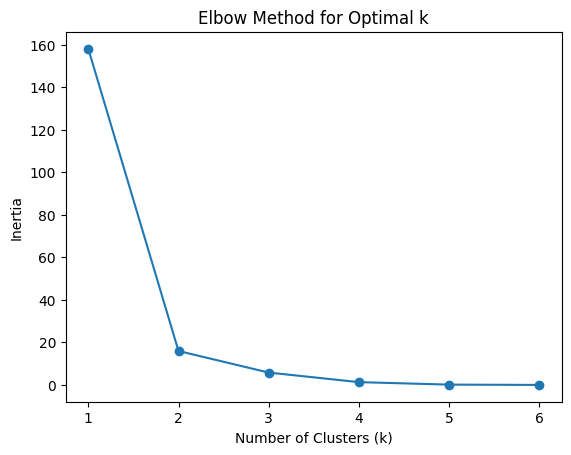

In [ ]:
# Find the optimal k number of clusters using elbow method
inertia = []
# Changed the upper bound of the range to the length of the dataset
for i in range(1, len(X) + 1):
    kmeans = KMeans(n_clusters=i, random_state=111)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, len(X) + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


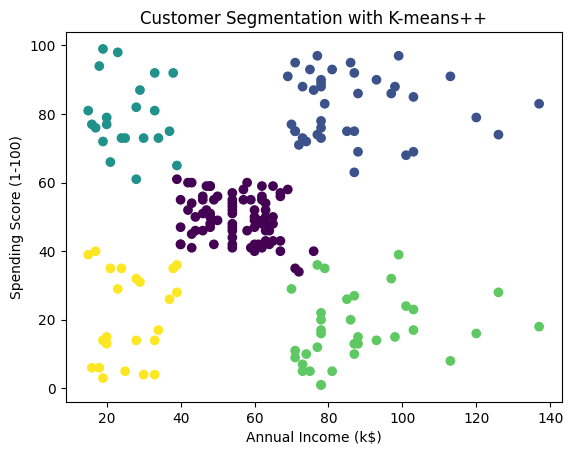

In [ ]:
#K-Means + +
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have a customer dataset in a CSV file named 'customer_data.csv'
# Replace 'customer_data.csv' with your actual file name
data = pd.read_csv('/content/Customers.csv')

# Select relevant features for clustering
# Example: Consider 'Annual Income' and 'Spending Score'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means++ with optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels for each customer
data['Cluster'] = kmeans.labels_

# Analyze the clusters, EXCLUDING the 'Gender' column
# Calculate the mean for numerical columns only
print(data.groupby('Cluster').mean(numeric_only=True))

# Visualize the clusters (optional)
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with K-means++')
plt.show()

In [ ]:
!pip install kmodes==0.12.2
from kmodes.kmodes import KModes
# Initialize K-Modes with 2 clusters
kmodes = KModes(n_clusters=2, init='Cao', verbose=1)

# Fit the model to the data
kmodes.fit(data)

# Print the cluster labels for each data point
print("Cluster Labels:", kmodes.labels_)

# Print the modes (representative points) for each cluster
print("\nCluster Modes (Centroids):\n", kmodes.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 881.0
Cluster Labels: [1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]

Cluster Modes (Centroids):
 [['3' 'Female' '31' '54' '42' '0']
 ['1' 'Male' '19' '71' '46' '0']]


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Assuming 'data' is your categorical dataset
labelencoder = LabelEncoder()
data_encoded = np.apply_along_axis(lambda col: labelencoder.fit_transform(col), 0, data)

import pandas as pd
from sklearn.decomposition import PCA

# Assuming 'data_encoded' is your numerically encoded dataset
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded)


# Get the encoded centroids
centroid_encoded = np.apply_along_axis(lambda col: labelencoder.fit_transform(col), 0, kmodes.cluster_centroids_)

# Apply PCA to the encoded centroids
centroid_pca = pca.transform(centroid_encoded)

# Plot the data points
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmodes.labels_)

# Plot the centroids with a different marker
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='*', s=200, c='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-modes Clustering Visualization with Centroids')
plt.show()

ValueError: X has 3 features, but PCA is expecting 4 features as input.

ValueError: 'c' argument has 200 elements, which is inconsistent with 'x' and 'y' with size 4.

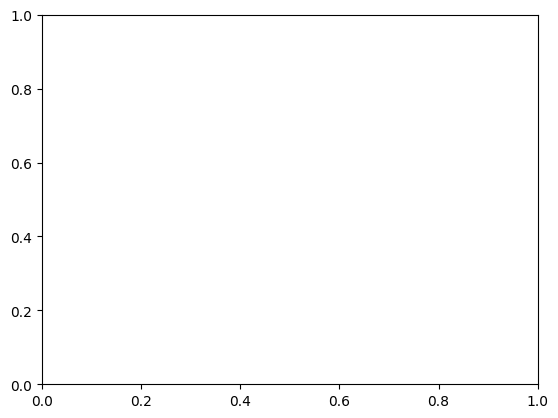

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Assuming 'data' is your categorical dataset
labelencoder = LabelEncoder()
data_encoded = np.apply_along_axis(lambda col: labelencoder.fit_transform(col), 0, data)

import pandas as pd
from sklearn.decomposition import PCA

# Assuming 'data_encoded' is your numerically encoded dataset
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded)


# Get the encoded centroids
centroid_encoded = np.apply_along_axis(lambda col: labelencoder.fit_transform(col), 0, kmodes.cluster_centroids_)

# Apply PCA to the encoded centroids
# Ensure the encoded centroids have the same number of features as the original data
centroid_encoded = np.pad(centroid_encoded, ((0, 0), (0, data_encoded.shape[1] - centroid_encoded.shape[1])), 'constant')
centroid_pca = pca.transform(centroid_encoded)

# Plot the data points
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmodes.labels_)

# Plot the centroids with a different marker
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='*', s=200, c='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-modes Clustering Visualization with Centroids')
plt.show()

In [ ]:
# KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('Customers.csv')

# Select features and target variable
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.575
Confusion Matrix:
 [[14  7]
 [10  9]]
Classification Report:
               precision    recall  f1-score   support

      Female       0.58      0.67      0.62        21
        Male       0.56      0.47      0.51        19

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.57      0.57      0.57        40



In [ ]:
# 1.Create a dataset with 4 parameters and perform

#  a) Euclidean distance

#  b) Manhattan Distance

#  c) Minkowski Distance
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

# Sample dataset with 4 parameters
data = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

# a) Euclidean distance
euclidean_dist = euclidean_distances(data)
print("Euclidean distances:\n", euclidean_dist)

# b) Manhattan Distance
manhattan_dist = manhattan_distances(data)
print("\nManhattan distances:\n", manhattan_dist)

# c) Minkowski Distance
# Minkowski distance is a generalization of Euclidean and Manhattan distances.
# It requires an additional parameter 'p'. For p=1, it's Manhattan, and for p=2, it's Euclidean.
p = 3  # Example value for p
minkowski_dist = np.power(np.sum(np.abs(data[:, np.newaxis, :] - data[np.newaxis, :, :]) ** p, axis=2), 1/p)
print("\nMinkowski distances (p=3):\n", minkowski_dist)

Euclidean distances:
 [[ 0.  8. 16. 24.]
 [ 8.  0.  8. 16.]
 [16.  8.  0.  8.]
 [24. 16.  8.  0.]]

Manhattan distances:
 [[ 0. 16. 32. 48.]
 [16.  0. 16. 32.]
 [32. 16.  0. 16.]
 [48. 32. 16.  0.]]

Minkowski distances (p=3):
 [[ 0.          6.34960421 12.69920842 19.04881262]
 [ 6.34960421  0.          6.34960421 12.69920842]
 [12.69920842  6.34960421  0.          6.34960421]
 [19.04881262 12.69920842  6.34960421  0.        ]]


In [ ]:
#2. Train and Test Accuracy

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset (Iris dataset for classification)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Example with 5 neighbors
knn.fit(X_train, y_train)

# Calculate accuracies
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9666666666666667
Test Accuracy: 1.0


In [ ]:
# 3. Finding Optimal K and Rebuilding (Classification Example)
k_values = range(1, 21)
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Find the optimal k
optimal_k = k_values[np.argmax(test_accuracies)]
print("Optimal k:", optimal_k)

# Rebuild the model with the optimal k
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)

Optimal k: 1


KNeighborsClassifier(n_neighbors=1)

In [ ]:
#4. Applying to Classification and Regression
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor

# Load the California Housing dataset (for regression)
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Example with 5 neighbors
knn_regressor.fit(X_train, y_train)

# Make predictions and evaluate (example using mean squared error)
from sklearn.metrics import mean_squared_error
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1186823858768293


In [ ]:
!pip install kmodes

import pandas as pd
from kmodes.kmodes import KModes

# Assuming you have a customer dataset in a CSV file named 'customer_data.csv'
# Replace 'customer_data.csv' with your actual file name
data = pd.read_csv('Customers.csv')

# Select relevant features for clustering (categorical features)
# Example: Consider 'Gender', 'Profession', and 'City'
X = data[['Gender', 'Age', 'Annual Income (k$)']]

# Apply K-modes with Hamming distance (remove the 'metric' parameter)
# The Hamming distance is the default distance metric for KModes
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
kmodes.fit(X)

# Get cluster labels for each customer
data['Cluster'] = kmodes.labels_

# Analyze the clusters
print(data.groupby('Cluster').agg(lambda x: x.value_counts().index[0]))

# Visualize the clusters (optional)
# Since K-modes deals with categorical data, visualization might be different
# You can explore techniques like parallel coordinate plots or other categorical data visualization methods

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11, cost: 358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15, cost: 361.0
Best run was number 3
         CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                     
0                 3  Female   32                  78                      42
1                39  Female   36                  87                      75
2                 9    Male   48

In [ ]:
# Create a dataset for four parameters and store it
# Perform Euclidean distance

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Create a sample dataset with four parameters
data = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])

# Calculate Euclidean distances between all pairs of data points
euclidean_dist = euclidean_distances(data)

print("Euclidean distances:\n", euclidean_dist)


Euclidean distances:
 [[ 0.  8. 16. 24.]
 [ 8.  0.  8. 16.]
 [16.  8.  0.  8.]
 [24. 16.  8.  0.]]


In [ ]:
# a) Euclidean distance
# b) Manhattan Distance
# c) Minkowski Distance

import numpy as np

def euclidean_distance(x1, x2):
  """Calculates the Euclidean distance between two points."""
  return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
  """Calculates the Manhattan distance between two points."""
  return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p):
  """Calculates the Minkowski distance between two points."""
  return np.power(np.sum(np.abs(x1 - x2) ** p), 1/p)

# Example usage:
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

euclidean_dist = euclidean_distance(point1, point2)
manhattan_dist = manhattan_distance(point1, point2)
minkowski_dist = minkowski_distance(point1, point2, p=3)  # Example with p=3

print("Euclidean distance:", euclidean_dist)
print("Manhattan distance:", manhattan_dist)
print("Minkowski distance:", minkowski_dist)


Euclidean distance: 5.196152422706632
Manhattan distance: 9
Minkowski distance: 4.3267487109222245


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [ ]:
df = pd.read_csv('/content/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


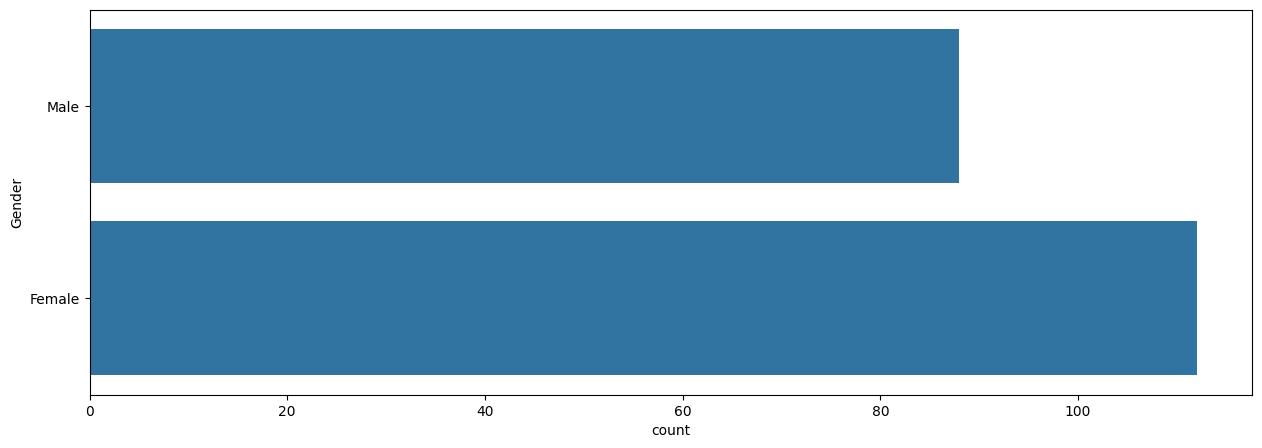

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

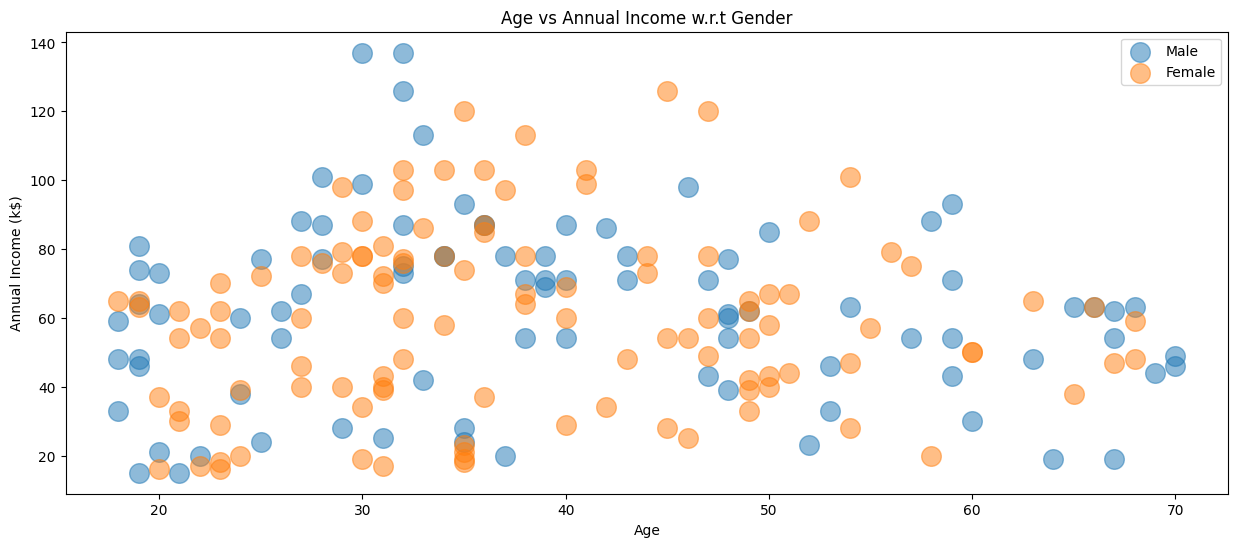

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

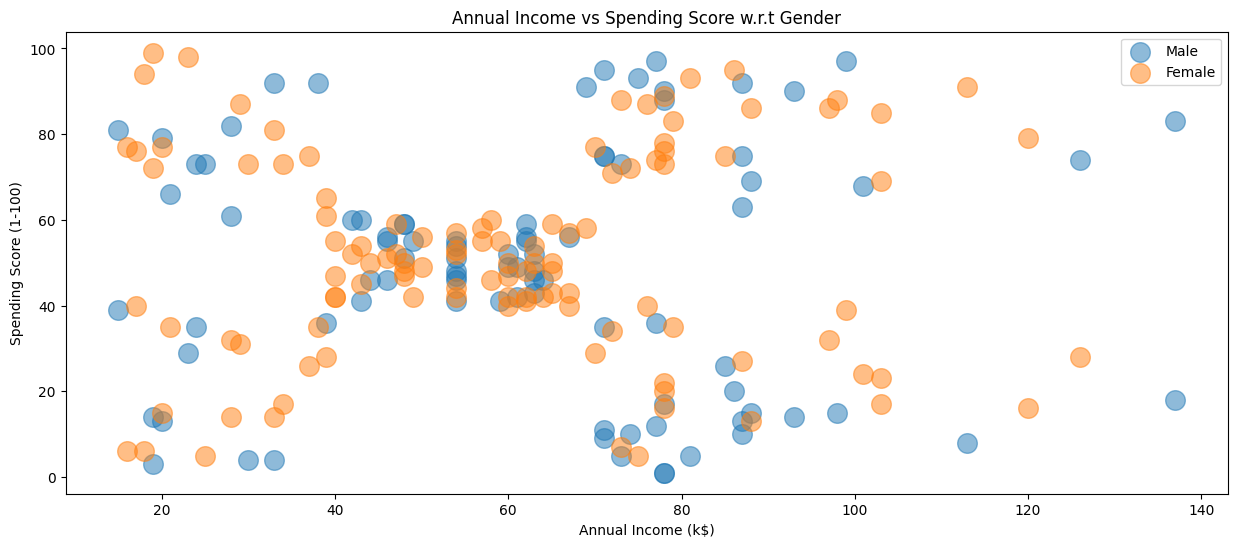

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [ ]:
# prompt: impute or encode male and female data of gender to binary

# Assuming 'df' is your DataFrame
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1429: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

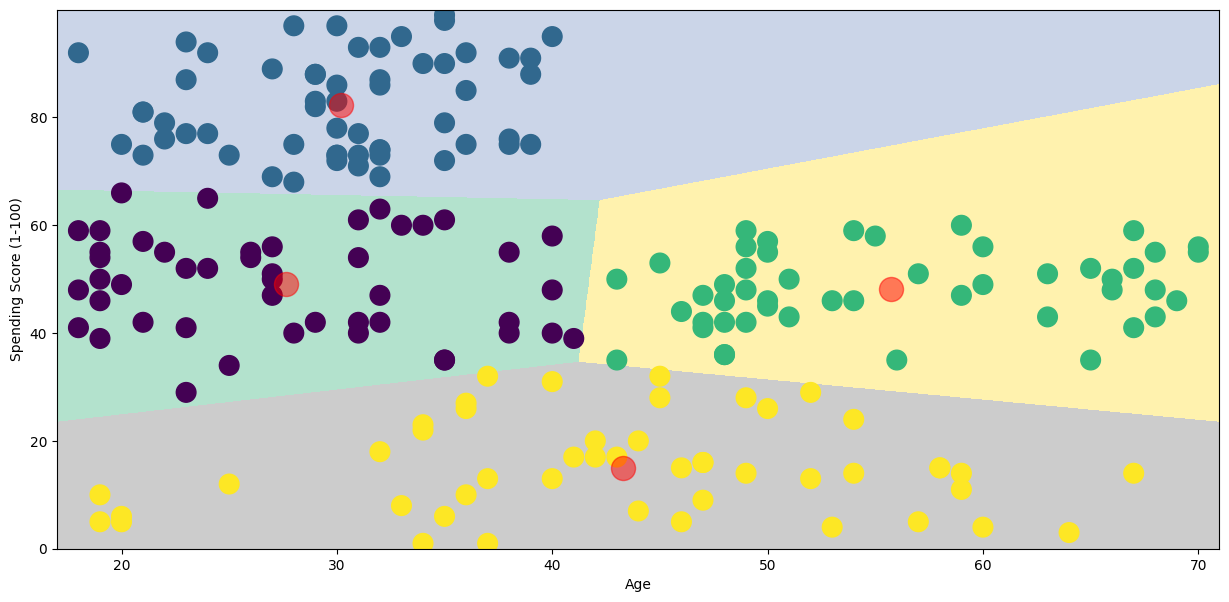

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()